In [3]:
!pip install matplotlib
!pip install pandas
!pip install np

     |████████████████████████████████| 11.6 MB 3.1 MB/s eta 0:00:01    |█████████████████████▉          | 7.9 MB 3.1 MB/s eta 0:00:02
     |████████████████████████████████| 88 kB 2.7 MB/s  eta 0:00:01
     |████████████████████████████████| 14.5 MB 23.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 38.5 MB/s eta 0:00:01
     |████████████████████████████████| 10.5 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 41.6 MB/s eta 0:00:01
  Created wheel for np: filename=np-1.0.2-py3-none-any.whl size=13652 sha256=563d4a1a814180d6017910c41346bf9a3f7b219bdbbad1ebac79595b7459fe7f
  Stored in directory: /home/jovyan/.cache/pip/wheels/8d/31/5b/f3f27c678f2b3ad7e29903ed09bb7446717fd4c8b35f53973a
Successfully built np


In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os

# Volumes of Product

In [5]:
data_dir = "../for_tuning/"

In [6]:
# Variables per agent and time step
df1_steps = pd.read_csv(data_dir+"ex1_agent_steps.csv" , delimiter=";", header=0)
df2_steps = pd.read_csv(data_dir+"ex2_agent_steps.csv" , delimiter=";", header=0)
df3_steps = pd.read_csv(data_dir+"ex3_agent_steps.csv" , delimiter=";", header=0)
df5_steps = pd.read_csv(data_dir+"ex5_agent_steps.csv" , delimiter=";", header=0)
print(df5_steps.columns)

Index(['step', 'id', 'q_stock', 'q_consumed', 'q_wasted'], dtype='object')


In [7]:
agents = ['Grower_1','Grower_2','Distributor','Retailer','Transporter_1 (LD)','Transporter_2 (LD)', 'Transporter (SD)']

titles = {"q_stock":"Stock","q_wasted":"Wasted","q_consumed":"Consumed"}
def plots(df,field,ex):
    df_p = df[['step','id',field]]
    fig, ax = plt.subplots(figsize=(8,6))
    pls = []
    for label, dfg in df_p.groupby('id'):
        dfg.plot('step',field,ax=ax, label=agents[label-1], title=ex+": "+titles[field], marker = '.')
        
    plt.ylabel("product units")
    plt.xlabel("ticks")
    plt.legend(handles=ax.get_legend_handles_labels()[0], title='Agents', bbox_to_anchor=(1.05, 1), loc='upper left')

### Wasted Details

<function matplotlib.pyplot.show(close=None, block=None)>

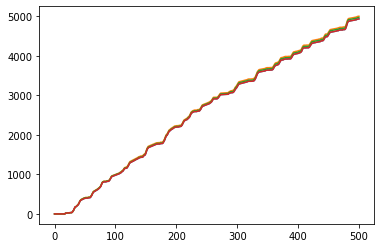

In [20]:
time_step = 0
df1_waste = np.array([])
df2_waste = np.array([])
df3_waste = np.array([])
df5_waste = np.array([])

while time_step < 501:
    df1_waste_step = df1_steps[df1_steps["step"]== time_step].sum()["q_wasted"]
    df1_waste = np.append(df1_waste, df1_waste_step)
    
    df2_waste_step = df2_steps[df1_steps["step"]== time_step].sum()["q_wasted"]
    df2_waste = np.append(df2_waste, df2_waste_step)
    
    df3_waste_step = df3_steps[df3_steps["step"]== time_step].sum()["q_wasted"]
    df3_waste = np.append(df3_waste, df3_waste_step)
    
    df5_waste_step = df5_steps[df5_steps["step"]== time_step].sum()["q_wasted"]
    df5_waste = np.append(df5_waste, df5_waste_step)
    
    time_step += 1

plt.plot(df1_waste)
plt.plot(df2_waste)
plt.plot(df3_waste)
plt.plot(df5_waste)

plt.show

In [32]:
## Waste in Ex1
df1_w_tot = df1_steps.sum()["q_wasted"]
df1_c_tot = df1_steps.sum()["q_consumed"]
df1_final_stock = df1_steps[df1_steps["step"]== 500].sum()["q_stock"]
df1_w_per = (df1_w_tot/(df1_c_tot+df1_w_tot+df1_final_stock))*100

## Waste in Ex2
df2_w_tot = df2_steps.sum()["q_wasted"]
df2_c_tot = df2_steps.sum()["q_consumed"]
df2_final_stock = df2_steps[df2_steps["step"]== 500].sum()["q_stock"]
df2_w_per = (df2_w_tot/(df2_c_tot+df2_w_tot+df2_final_stock))*100

## Waste in Ex3
df3_w_tot = df3_steps.sum()["q_wasted"]
df3_c_tot = df3_steps.sum()["q_consumed"]
df3_final_stock = df3_steps[df3_steps["step"]== 500].sum()["q_stock"]
df3_w_per = (df3_w_tot/(df3_c_tot+df3_w_tot+df3_final_stock))*100

## Waste in Ex5
df5_w_tot = df5_steps.sum()["q_wasted"]
df5_c_tot = df5_steps.sum()["q_consumed"]
df5_final_stock = df5_steps[df5_steps["step"]== 500].sum()["q_stock"]
df5_w_per = (df5_w_tot/(df5_c_tot+df5_w_tot+df5_final_stock))*100

print("Ex1")
print("final stock:", df1_final_stock)
print("units consumed:", df1_c_tot)
print("units wasted:", df1_w_tot)
print("percentage waste:", round(df1_w_per,2), "%")
print("")
print("Ex2")
print("final stock:", df2_final_stock)
print("units consumed:", df2_c_tot)
print("units wasted:", df2_w_tot)
print("percentage waste:", round(df2_w_per,2), "%")
print("")
print("Ex3")
print("final stock:", df3_final_stock)
print("units consumed:", df3_c_tot)
print("units wasted:", df3_w_tot)
print("percentage waste:", round(df3_w_per,2), "%")
print("")
print("Ex5")
print("final stock:", df5_final_stock)
print("units consumed:", df5_c_tot)
print("units wasted:", df5_w_tot)
print("percentage waste:", round(df5_w_per,2), "%")
print("")

Ex1
final stock: 341
units consumed: 486666
units wasted: 1286041
percentage waste: 72.53 %

Ex2
final stock: 349
units consumed: 463532
units wasted: 1306904
percentage waste: 73.8 %

Ex3
final stock: 349
units consumed: 474562
units wasted: 1296890
percentage waste: 73.2 %

Ex5
final stock: 341
units consumed: 486666
units wasted: 1286041
percentage waste: 72.53 %



### Stock

In [ ]:
plots(df1_steps,'q_stock','ex1')
plots(df2_steps,'q_stock','ex2')
plots(df3_steps,'q_stock','ex3')
plots(df5_steps,'q_stock','ex5')

### Consumed

In [ ]:
plots(df1_steps,'q_consumed',"ex1")
plots(df2_steps,'q_consumed',"ex2")
plots(df3_steps,'q_consumed',"ex3")
plots(df5_steps,'q_consumed',"ex4")

### Wasted

In [ ]:
plots(df1_steps,'q_wasted',"ex1")
plots(df2_steps,'q_wasted',"ex2")
plots(df3_steps,'q_wasted',"ex3")
plots(df5_steps,'q_wasted',"ex5")

# Product Decay

In [ ]:
# Product life tracker
df1_life = pd.read_csv(data_dir+"ex1_life_tracker.csv" , delimiter=";", header=0)
df2_life = pd.read_csv(data_dir+"ex2_life_tracker.csv" , delimiter=";", header=0)
df3_life = pd.read_csv(data_dir+"ex3_life_tracker.csv" , delimiter=";", header=0)
df5_life = pd.read_csv(data_dir+"ex5_life_tracker.csv" , delimiter=";", header=0)

In [ ]:
def plot_decay(df_life,ex):
    plt.plot(df_life['steps'],df_life['shelf_life'], label=ex,marker = '.')
    plt.ylabel("reference shelf_life")
    plt.xlabel("ticks")
    plt.title("Mean Shelf life ")
    plt.legend()

In [ ]:
plot_decay(df1_life,"ex1")
plot_decay(df2_life,"ex2")
plot_decay(df3_life,"ex3")
plot_decay(df5_life,"ex5")